<a href="https://colab.research.google.com/github/chellick/Super_resolution/blob/main/CNN_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 #ignore
import tensorflow as tf
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import time

In [ ]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
x_train_lr = torch.tensor(np.array(tf.image.resize(x_train, (x_train.shape[1] // 2, x_train.shape[2] // 2))), dtype=torch.float32)[:7000]
x_test_lr = torch.tensor(np.array(tf.image.resize(x_test, (x_test.shape[1] // 2, x_test.shape[2] // 2))), dtype=torch.float32)[:3000]

# Convert to float32 for x_train_hr and x_test_hr
x_train_hr = torch.tensor(x_train, dtype=torch.float32)[:7000]
x_test_hr = torch.tensor(x_test, dtype=torch.float32)[:3000]

x_train_lr = x_train_lr.permute(0, 3, 1, 2)
x_test_lr = x_test_lr.permute(0, 3, 1, 2)

x_train_hr = x_train_hr.permute(0, 3, 1, 2)
x_test_hr = x_test_hr.permute(0, 3, 1, 2)


train_dataset = TensorDataset(x_train_lr, x_train_hr)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
from torch.nn.modules.upsampling import Upsample
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layers = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3,3), padding="same"),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3,3), padding="same"),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=3, kernel_size=(3,3), padding="same"),
            nn.BatchNorm2d(3),
            nn.ReLU(),
            nn.Conv2d(in_channels=3, out_channels=3, kernel_size=(3,3), padding="same"),
            nn.Upsample(size=(32, 32), mode='bilinear'),
    )


  def forward(self, x):
    return self.layers(x)


In [ ]:
model = CNN()
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
model.parameters

<bound method Module.parameters of CNN(
  (layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU()
    (5): Conv2d(32, 3, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (6): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (9): Upsample(size=(32, 32), mode='bilinear')
  )
)>

In [ ]:
prediction = model(x_train_lr[:1])
prediction = prediction.permute(0, 2, 3, 1)
prediction.shape

torch.Size([1, 32, 32, 3])

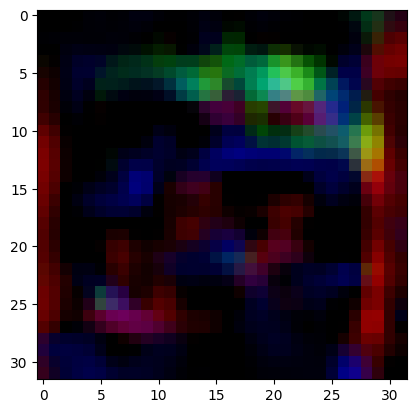

In [ ]:
plt.imshow(prediction[0].detach().numpy())
plt.show()

In [ ]:
for epoch in range(100):
    model.train()
    start_time = time.time()
    for batch_x, batch_y in train_loader:
        pred = model(batch_x)
        loss = loss_fn(pred, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(" Loss:", loss.item(), "\n", "Epoch:", epoch, "\n", "Time:",  time.time() - start_time, "\n")


 Loss: 0.2969021797180176 
 Epoch: 0 
 Time: 4.763331174850464 

 Loss: 0.25435441732406616 
 Epoch: 1 
 Time: 3.736159324645996 

 Loss: 0.14900167286396027 
 Epoch: 2 
 Time: 3.7872073650360107 

 Loss: 0.13812586665153503 
 Epoch: 3 
 Time: 4.662527084350586 

 Loss: 0.09852062165737152 
 Epoch: 4 
 Time: 3.9190611839294434 

 Loss: 0.08666941523551941 
 Epoch: 5 
 Time: 3.819526195526123 

 Loss: 0.08888270705938339 
 Epoch: 6 
 Time: 4.5220184326171875 

 Loss: 0.08469505608081818 
 Epoch: 7 
 Time: 3.909118890762329 

 Loss: 0.07463256269693375 
 Epoch: 8 
 Time: 3.781724214553833 

 Loss: 0.08387655019760132 
 Epoch: 9 
 Time: 4.244129657745361 

 Loss: 0.07469023764133453 
 Epoch: 10 
 Time: 4.2007646560668945 

 Loss: 0.0769849419593811 
 Epoch: 11 
 Time: 3.794578790664673 

 Loss: 0.06881865859031677 
 Epoch: 12 
 Time: 4.201437473297119 

 Loss: 0.06745510548353195 
 Epoch: 13 
 Time: 4.563258409500122 

 Loss: 0.06141873076558113 
 Epoch: 14 
 Time: 4.17953085899353 

 Los

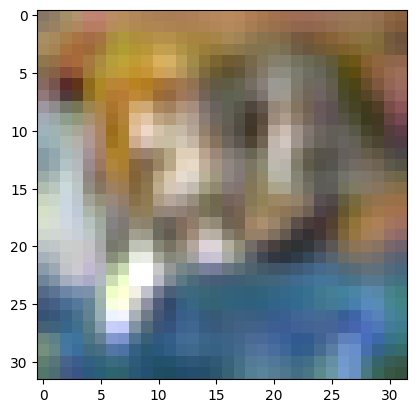

In [ ]:
prediction = model(x_test_lr[:1])
prediction = prediction.permute(0, 2, 3, 1)

plt.imshow(prediction[0].detach().numpy())
plt.show()

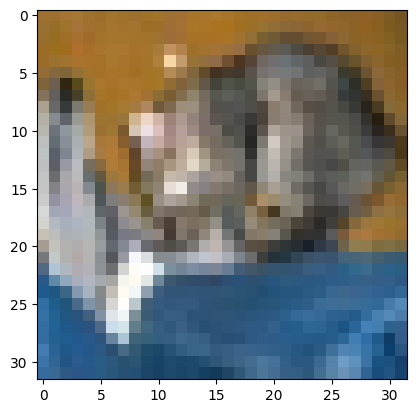

In [ ]:
true_im = x_test_hr[:1]
true_im = true_im.permute(0, 2, 3, 1)

plt.imshow(true_im[0].detach().numpy())
plt.show()

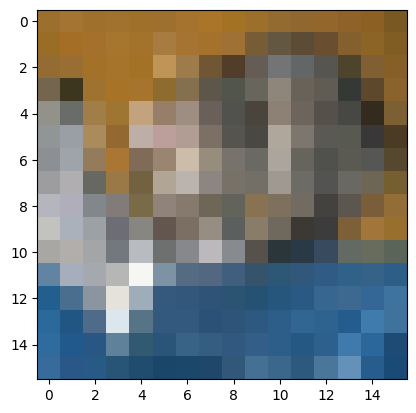

In [ ]:
input_im = x_test_lr[:1]
input_im = input_im.permute(0, 2, 3, 1)

plt.imshow(input_im[0].detach().numpy())
plt.show()
